In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import numpy as np


In [2]:
# Load up the file and put it into a dataFrame
path=str('D:\\DataSets\\Corona\\covid_de.csv')
#pop=str('D:\\DataSets\\Corona\\Population1.xlsx')


path=path.replace('\\','/')
#pop=pop.replace('\\','/')

df=pd.read_csv(path)
#df_pop=pd.read_csv(filepath_or_buffer=pop,sep=',',encoding='cp1252')
#df_pop=pd.read_excel(io=pop)

pd.set_option("display.max.rows",None)


In [3]:
#explore the df

In [4]:
#print(df.describe())
#print('--next--')
#print(df.info())

In [5]:
#Columns
#print(df.columns)
df['date']=pd.to_datetime(df['date'])
#df['date'].values=df.sort_values(by=df['date'],ascending=True,axis=1)
#print(df.info())
#print(df)

In [6]:
print(max(df['date']))

2021-03-11 00:00:00


In [7]:
quantitative=[i for i in df.columns if df[i].dtype !='object']
qualitative=[i for i in df.columns if df[i].dtype =='object']

In [8]:
print(quantitative)

['date', 'cases', 'deaths', 'recovered']


In [9]:
print(qualitative)

['state', 'county', 'age_group', 'gender']


In [10]:
# Handling missing value in quantitative
df.isna().any()

state        False
county       False
age_group     True
gender        True
date         False
cases        False
deaths       False
recovered    False
dtype: bool

In [11]:
for i in qualitative:
    df[i]=df[i].astype('category')
    if df[i].isnull().any():
        df[i]=df[i].cat.add_categories(['MISSING'])
        df[i]=df[i].fillna('MISSING')
        

In [12]:
df.isna().any()

state        False
county       False
age_group    False
gender       False
date         False
cases        False
deaths       False
recovered    False
dtype: bool

In [13]:
# All Cases

Text(0.5, 1.0, 'Deaths per day')

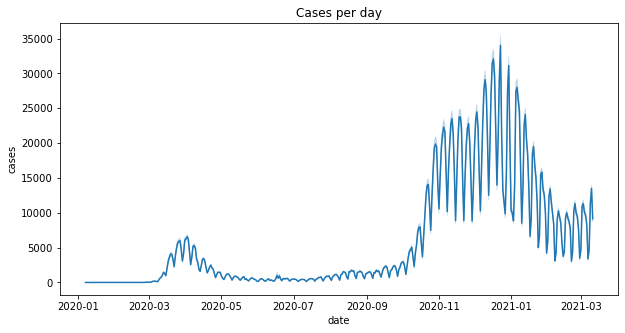

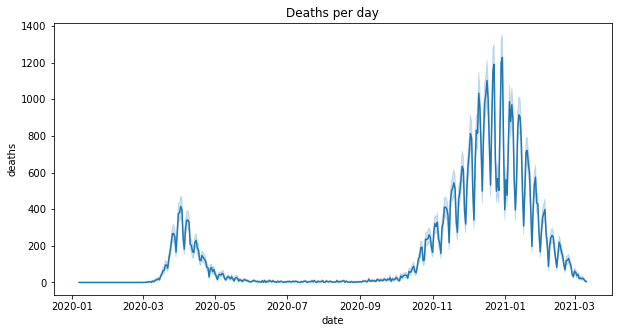

In [14]:
plt.figure(1,figsize=(10,5))
sns.lineplot(data=df,x='date',y='cases',estimator=sum)
plt.title('Cases per day')

plt.figure(2,figsize=(10,5))
sns.lineplot(data=df,x='date',y='deaths',estimator=sum)
plt.title('Deaths per day')

In [15]:
df=df.sort_values(by=['date'],ascending=True)
df_pivot=df.pivot_table(values=['cases'],index='date',aggfunc=np.sum)
#print(df_pivot)

In [16]:
# All Deaths

In [17]:
#Funktion to call the lineplot
def lineplot_death(DataFrame,title):
    fig,ax=plt.subplots(figsize=(10,5))
    fig=sns.lineplot(data=DataFrame
                     ,x='date'
                     ,y='deaths'
                     ,estimator=sum
                     ,ci=None
                     ,hue='age_group')
    plt.title(title)
    

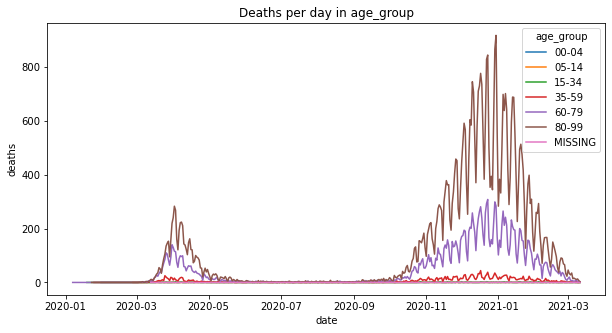

In [18]:
lineplot_death(df,'Deaths per day in age_group')


In [19]:
print(df['deaths'].groupby(df['age_group']).sum())
print('Total: '+str(df['deaths'].sum()))

age_group
00-04          4
05-14          5
15-34         92
35-59       2368
60-79      19721
80-99      50847
MISSING       17
Name: deaths, dtype: int64
Total: 73054


In [20]:
#Gender comparrisson

In [21]:
df_female=df[df['gender']=='F']
print(df_female['gender'].value_counts())

df_male=df[df['gender']=='M']
print(df_male['gender'].value_counts())


F          300762
M               0
MISSING         0
Name: gender, dtype: int64
M          297432
F               0
MISSING         0
Name: gender, dtype: int64


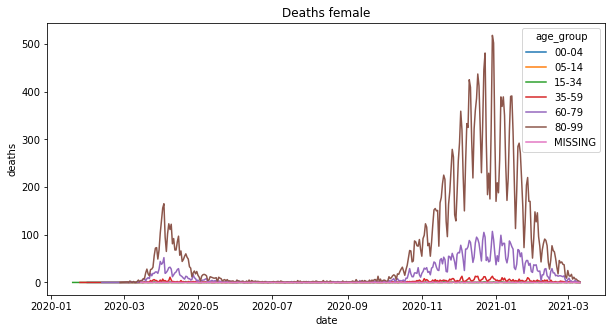

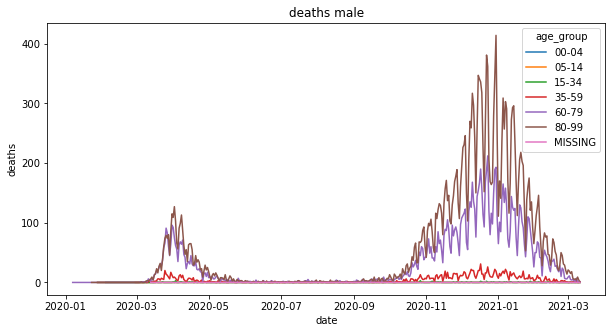

In [22]:
lineplot_death(df_female,'Deaths female')
lineplot_death(df_male,'deaths male')

In [23]:
print(sum(df_female['cases']))
print(sum(df_male['cases']))

1331627
1195868


In [24]:
df_fatility=df.pivot_table(values=['cases','deaths'],index='gender',aggfunc=sum,margins=True,margins_name='Total')

fatility_ratio=[]
for i in df_fatility.index:
    x=np.around(df_fatility.loc[i]['deaths']/df_fatility.loc[i]['cases'],decimals=4)
    fatility_ratio.append(x)

    
df_fatility['Fatility Ratio']=fatility_ratio
print(df_fatility)

           cases  deaths  Fatility Ratio
gender                                  
F        1331627   35435          0.0266
M        1195868   37420          0.0313
MISSING    18002     199          0.0111
Total    2545497   73054          0.0287


The Fatility Ratio from Males is higher than female and also higher than the total fatility ratio of all groups. Therefore males seems to be more prone to fatility than females. To understand the distribution of males and females we now will have a look closer to the gender an the age group. Caution with the pivot-table. It has a filterflow. That means, that the total sum is not equal to the sum of the values appearing in the table. It is the sum over the whole DataFrame, even if some values are drop, for instance the MISSING values. In the following example, the MISSING category is droped due to better readability.

In [25]:
df_fatility_ages=df.pivot_table(values=['cases','deaths']
                                ,index=['age_group','gender']
                                ,aggfunc=sum
                                ,margins=True
                                ,margins_name='Total'
                               )

fatility_ratio_ages=[]
for i in df_fatility_ages.index:
    x=np.around(df_fatility_ages.loc[i]['deaths']/df_fatility_ages.loc[i]['cases'],decimals=4)
    fatility_ratio_ages.append(x)
    
df_fatility_ages['Fatility Ratio']=fatility_ratio_ages
df_fatility_ages



cases  deaths  Fatility Ratio
age_group gender                                  
00-04     F          23296       3          0.0001
          M          25017       1          0.0000
          MISSING      641       0          0.0000
05-14     F          68682       2          0.0000
          M          75046       3          0.0000
          MISSING     1551       0          0.0000
15-34     F         367255      36          0.0001
          M         361842      56          0.0002
          MISSING     5642       0          0.0000
35-59     F         506843     710          0.0014
          M         455689    1654          0.0036
          MISSING     6002       4          0.0007
60-79     F         196548    6735          0.0343
          M         193533   12943          0.0669
          MISSING     1801      43          0.0239
80-99     F         167967   27942          0.1664
          M          83712   22758          0.2719
          MISSING     1203     147          0.1222
MISSING   F           1036       7          0.0068
          M           1029       5          0.0049
          MISSING     1162       5          0.0043
Total              2545497   73054          0.0287

As you can see, inside the differend age_groups the fatility ratio of male is almost twice more than for female.

In [26]:
# Are males mor affective  to a critical state due to corona in relativ to the sum of cases at the same gender?
female_cases=df_female['cases'].sum()
female_deaths=df_female['deaths'].sum()
male_cases=df_male['cases'].sum()
male_deaths=df_male['deaths'].sum()

prop={'female':round((female_deaths/female_cases)*100,2),'male':round((male_deaths/male_cases)*100,2)}


In [27]:
print(prop)

{'female': 2.66, 'male': 3.13}


In [28]:
#deaths by age posibility

In [29]:
df_age=df.groupby(by='age_group')[['deaths','cases']].agg(sum)

In [30]:
death_to_case=[]
death_to_case_thousand=[]

for i in df_age.index:
    print(i)
    x=np.around((df_age.loc[i]['deaths']/df_age.loc[i]['cases'])*100,decimals=3)
    y=x*1000
    death_to_case.append(x)
    death_to_case_thousand.append(y)    

00-04
05-14
15-34
35-59
60-79
80-99
MISSING


In [31]:
df_age['posibility_to_death_%']=death_to_case
df_age['deaths per 100_000']=death_to_case_thousand

print(df_age)

           deaths   cases  posibility_to_death_%  deaths per 100_000
age_group                                                           
00-04           4   48954                  0.008                 8.0
05-14           5  145279                  0.003                 3.0
15-34          92  734739                  0.013                13.0
35-59        2368  968534                  0.244               244.0
60-79       19721  391882                  5.032              5032.0
80-99       50847  252882                 20.107             20107.0
MISSING        17    3227                  0.527               527.0


In [32]:
###overview###

In [33]:
df.agg({'cases':sum,'deaths':sum,'recovered':sum})

cases        2545497
deaths         73054
recovered    2345285
dtype: int64

In [34]:
df_group_overview=df.groupby(by='date')[['cases','recovered','deaths']].agg(sum)

Text(0.5, 1.0, 'Cases vs. Deaths')

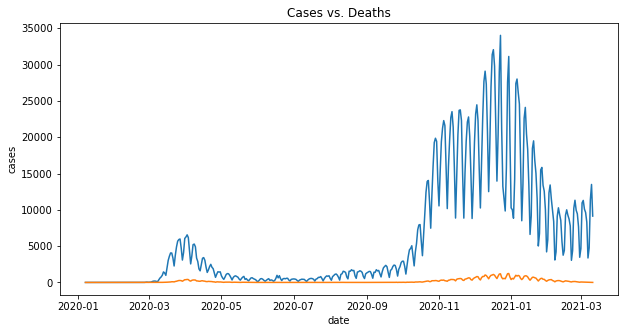

In [35]:
plt.figure(1,figsize=(10,5))
sns.lineplot(data=df_group_overview,x='date',y='cases',estimator=sum)
sns.lineplot(data=df_group_overview,x='date',y='deaths',estimator=sum)
plt.title('Cases vs. Deaths')

<AxesSubplot:ylabel='Frequency'>

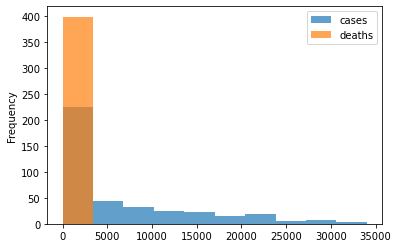

In [36]:
df_group_overview[['cases','deaths']].plot(kind='hist',alpha=.7,sharex=True,sharey=True)

In [37]:
#kumulative view#

In [38]:
#Just a Test#

In [39]:
path_pop='D:/DataSets/Corona/Altersstrucktur_201901231.xls'

df_pop=pd.read_excel(io=path_pop,header=0)

In [40]:
df_group_overview.loc[:'2021-01-29']['deaths'].sum()

67293